# **Graphs - DFS**

Example 1: 547. Number of Provinces

There are n cities. A province is a group of directly or indirectly connected cities and no other cities outside of the group. You are given an n x n matrix isConnected where isConnected[i][j] = isConnected[j][i] = 1 if the ith city and the jth city are directly connected, and isConnected[i][j] = 0 otherwise. Return the total number of provinces.

If you're a beginner, we recommend clicking on the problem link and having it open in another tab for all problems in this article so that you can see the example test cases and any images associated with them. You should also be familiar with graph terminology like "connected components". Please review the terminology in the article titled "Graphs" or have it open in another tab if you're not yet familiar with it.

We can see that this is an undirected graph where the graph is given as an adjacency matrix, and the problem is asking for the number of connected components. We can think of each city as a node and each connected component as a province.

Because the graph is undirected, a DFS from any given node will visit every node in the connected component it belongs to. To avoid cycles with undirected graphs, we need to use a set seen to track which nodes we have already visited. After performing a DFS on a connected component, all nodes in that component will be inside seen (because the DFS will visit every node in the component). Therefore, we can iterate from 0 until n, and each time we find a node that hasn't been visited yet, we know we also have a component that hasn't been visited yet, so we perform a DFS to "mark" the component as visited and increment our answer. The use of the set will prevent us from counting the same component more than once.

For convenience, we can convert the adjacency matrix to a hash map that maps nodes to an array of their neighbors before starting.

    Depending on the language you're using, if your keys are well defined (like the integers between 0 to n - 1), it might be better to use a boolean array instead of a set to implement seen.

In [3]:
from collections import defaultdict
def findCircleNum(isConnected):
    def dfs(node):
        for neighbor in graph[node]:
            if neighbor not in seen:
                seen.add(neighbor)
                dfs(neighbor)
    n = len(isConnected)
    graph = defaultdict(list)
    for i in range(n):
        for j in range(i+1, n):
            if isConnected[i][j]:
                graph[i].append(j)
                graph[j].append(i)
    seen = set()
    ans = 0
    for i in range(n):
        if i not in seen:
            ans += 1
            seen.add(i)
            dfs(i)
    return ans
isConnected = [[1,1,0],[1,1,0],[0,0,1]]
findCircleNum(isConnected)

2

Let's quickly talk about the code implementation and how implementing DFS here differs from trees. As mentioned before, with trees, we are given objects representing the nodes. Here, the nodes aren't exactly given to us. We are simply told that there exists some nodes numbered from 0 to n - 1, and we are given information regarding the edges.

Thus, we treat the integers from [0, n - 1] as the nodes. This is why our dfs(node) function is taking an integer as an argument. With trees, we passed the node object as an argument. Here, we pass the integer label of the node. This is a concept that you will need to master - with graphs, the graph only "exists" as an idea. It is up to you to implement a method of representing the nodes and edges and traversing over them. Thankfully, most graph problems will have the nodes labeled [0, n - 1], so we can re-use a lot of the logic between problems.

The time complexity of DFS on a graph is slightly different than when it is on a binary tree. With binary tree questions, we argued that each node is visited at most once, and each visit cost O(1). With graphs, we also only visit each node at most once, but the work is not necessarily O(1), because there is a for loop that iterates over the node's neighbors.

The reason visits were O(1) in a binary tree is because a node could have at most 2 children/neighbors, so we didn't need a loop. We just referenced node.left and node.right. With a graph, a node could have any amount of neighbors, so we need a non-constant loop.

As such, the time complexity for DFS on graphs is usually O(n+e), where n is the number of nodes and e is the number of edges. In the worst-case scenario where every node is connected with every other node, e=n^ 2
 .

- Each node is visited only once
- We iterate over a node's edges only when we are visiting that node
- Because we can only visit a node once, a node's edges are only iterated over once
- Therefore, all edges are iterated over only once, which costs 
O(e)

What about the space complexity? When we build graph, we are storing all the edges in arrays. We also need some space for the recursion call stack (O(n) in the worst case) as well as for seen. Therefore the space complexity is O(n+e).

The space complexity isn't O(n 2) because e is not necessarily dominated. In the worst case scenario, e=n 2 , but e is still independent of n. In the time complexity, we always iterated over the entire matrix to build the graph, but in terms of space complexity, the hash map only grows if the edges actually exist.

Example 2: 200. Number of Islands

Given an m x n 2D binary grid which represents a map of 1 (land) and 0 (water), return the number of islands. An island is surrounded by water and is formed by connecting adjacent land cells horizontally or vertically.

In [ ]:
from collections import deque
def numIslands(grid):
    def valid(row, col):
        return 0 <= row < m and 0 <= col < n and grid[row][col] == "1"
    
    def dfs(row, col):
        for dx, dy in directions:
            next_row, next_col = row + dy, col + dx
            if valid(next_row, next_col) and (next_row, next_col) not in seen:
                seen.add((next_row, next_col))
                dfs(next_row, next_col)
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    seen = set()
    ans = 0
    m = len(grid)
    n = len(grid[0])
    for row in range(m):
        for col in range(n):
            if grid[row][col] == "1" and (row, col) not in seen:
                ans += 1
                seen.add((row, col))
                dfs(row, col)
    
    return ans


Example 3: 1466. Reorder Routes to Make All Paths Lead to the City Zero

There are n cities numbered from 0 to n - 1 and n - 1 roads such that there is only one way to travel between two different cities. Roads are represented by connections where connections[i] = [x, y] represents a road from city x to city y. The edges are directed. You need to swap the direction of some edges so that every city can reach city 0. Return the minimum number of swaps needed.

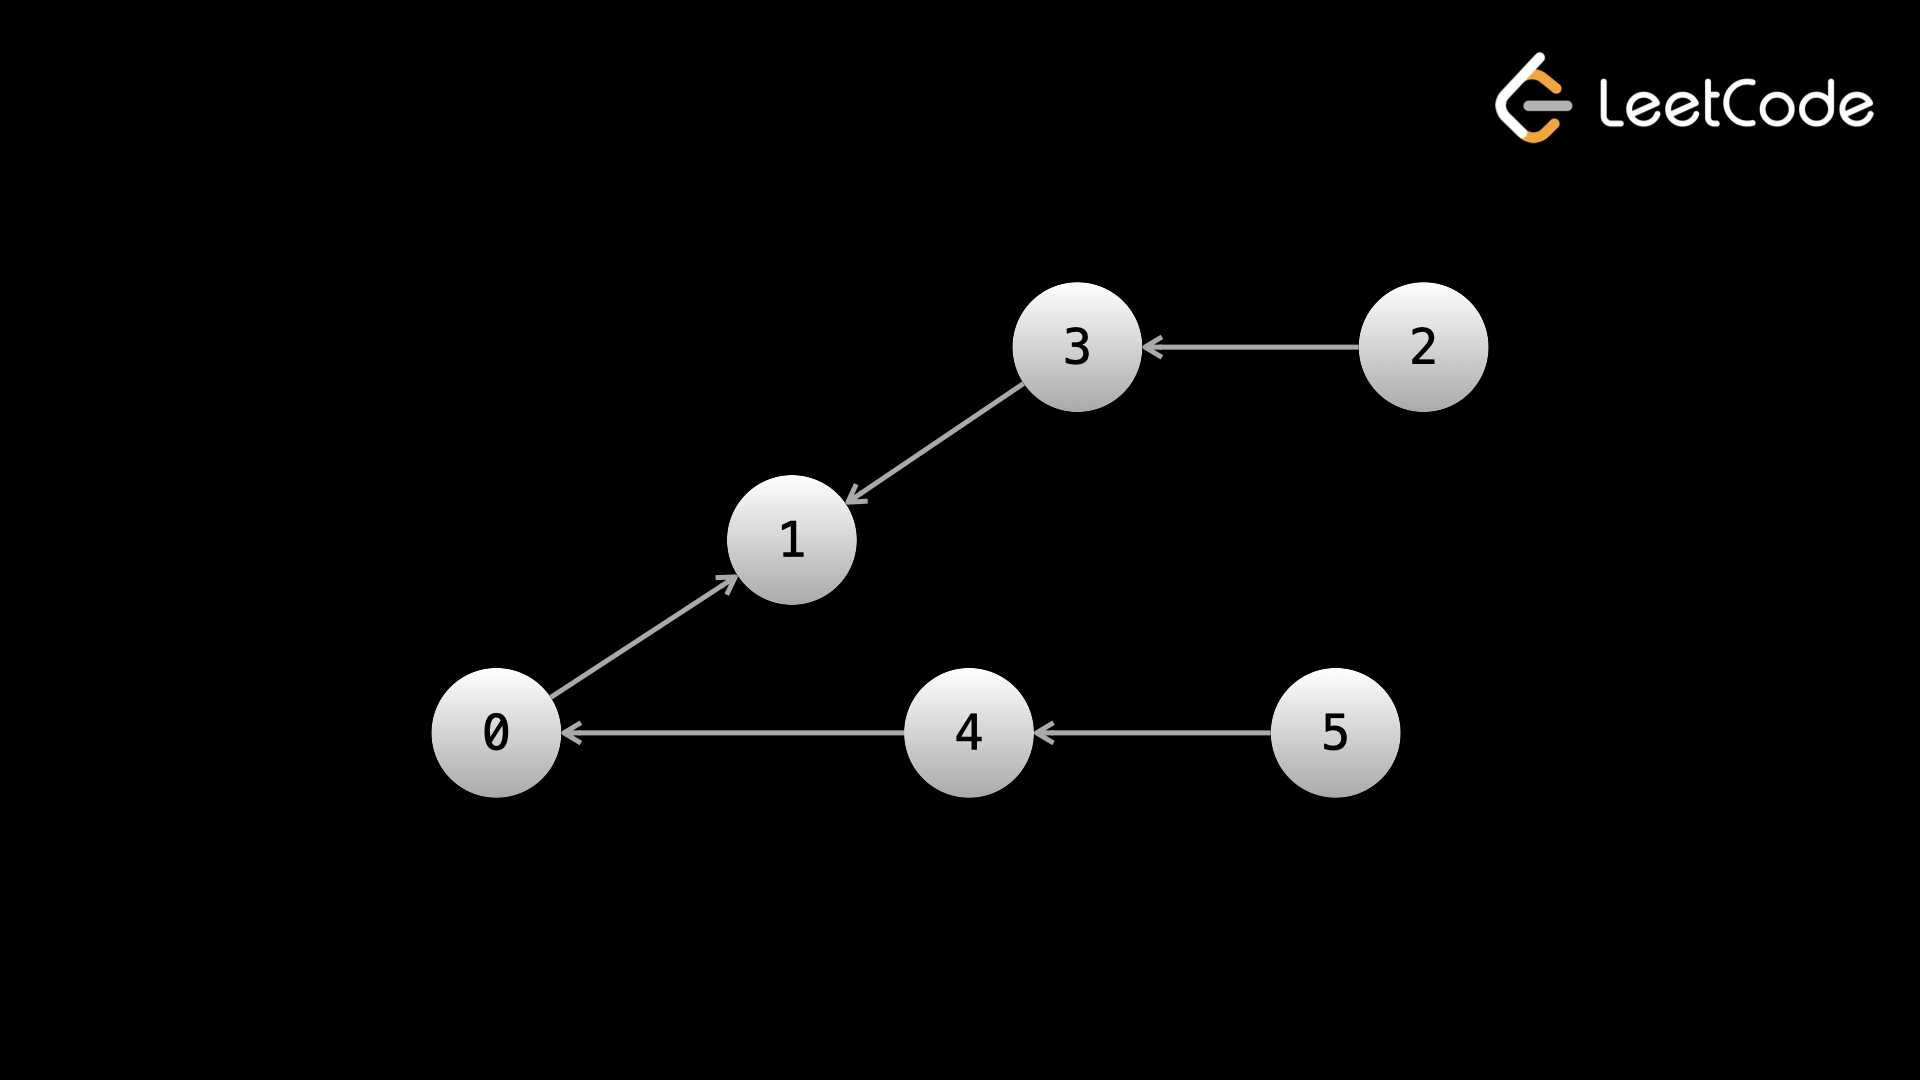

Here, we have a directed graph given as an array of edges. What edges do we need to swap? The problem states that there is only one way to travel between two different cities. We want every city to be able to reach 0, and because there is only one road between cities, all roads must be directed towards 0. This means we can traverse away from 0, and anytime we see that an edge is pointing away from 0, we know we need to swap it.

Although the graph is a directed graph, let's convert it into an undirected one so that we can reach all nodes from 0. Then, we can do a DFS starting at 0. Because our traversal direction is away from 0, at every node, every traversal to a neighbor that hasn't been visited will be away from 0. Therefore, if (node, neighbor) is in connections, we know we need to swap that road. To have fast O(1) checking for if a given edge is in connections, we can put the original directed edges in a set roads.

To summarize: we treat the graph as undirected just so that we can do a DFS starting at 0. During this DFS, every traversal we do is away from 0, so when we see an edge that we are crossing (node, neighbor) is in connections, we know we need to swap it (increment the answer).

In [7]:
def minReorder(n, connections):
    graph = defaultdict(list)
    road = set()
    ans = []
    for x, y in connections:
        graph[x].append(y)
        graph[y].append(x)
        road.add((x,y))
    def dfs(node):
        ans = 0
        for neighbor in graph[node]:
            if neighbor not in seen:
                if (node, neighbor) in road:
                    ans += 1
                seen.add(neighbor)
                ans += dfs(neighbor)
        return ans
    seen = {0}
    return dfs(0)
    
connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]
minReorder(7, connections)

3

Example 4: 841. Keys and Rooms

There are n rooms labeled from 0 to n - 1 and all the rooms are locked except for room 0. Your goal is to visit all the rooms. When you visit a room, you may find a set of distinct keys in it. Each key has a number on it, denoting which room it unlocks, and you can take all of them with you to unlock the other rooms. Given an array rooms where rooms[i] is the set of keys that you can obtain if you visited room i, return true if you can visit all the rooms, or false otherwise.

In the previous 3 examples, we have seen a graph given as an adjacency matrix, a graph in the form of a matrix, and a graph given as an array of edges. Here, rooms[i] is an array of other rooms we can visit from the current room, which makes this a graph given as an adjacency list. We start at room 0 and need to visit every room. At every node i, the neighbors are rooms[i]. If we can start a DFS at 0 and visit every node, then the answer is true. How can we tell how many rooms we visited at the end of the DFS? All the nodes we visited are stored in seen.

In [21]:
def canVisitAllRooms(rooms):
    graph = defaultdict(list)
    for i in range(len(rooms)):
        graph[i] = rooms[i]
    print(graph)
    def dfs(node):
        for neighbor in graph[node]:
            if neighbor not in seen:
                seen.add(neighbor)
                dfs(neighbor)
        
        return seen
    
    seen = {0}
    dfs(0)
    print(seen)
    for node in graph.keys():
        if node not in seen:
            return False
    
    return True   

rooms = [[1],[2],[3],[]]
canVisitAllRooms(rooms)

defaultdict(<class 'list'>, {0: [1], 1: [2], 2: [3], 3: []})
{0, 1, 2, 3}


True

Example 5: 1557. Minimum Number of Vertices to Reach All Nodes

Given a directed acyclic graph, with n vertices numbered from 0 to n-1, and an array edges where edges[i] = [x, y] represents a directed edge from node x to node y. Find the smallest set of vertices from which all nodes in the graph are reachable.

The problem wants the smallest set of nodes from which all other nodes can be reached. This can be rephrased as the smallest set of nodes that cannot be reached from other nodes, because if a node can be reached from another node, then we would rather just include the "parent" rather than the "child" in our set.

A node cannot be reached from another node if it has an indegree of 0 (no edges are entering the node). Therefore, we can just find the indegree of all nodes and only include the ones with a zero indegree.

In [24]:
def findSmallestSetOfVertices(n, edges):
    indegree = [0] * n 
    for _,y in edges:
        indegree[y] += 1
    return [i for i in range(n) if indegree[i] == 0]
edges = [[0,1],[0,2],[2,5],[3,4],[4,2]]   
findSmallestSetOfVertices(6, edges)

[0, 3]